#Datasets that we worked on:

**Time Use Source:** https://ourworldindata.org/time-use


**Labor Productivity:** https://ilostat.ilo.org/topics/labour-productivity/

##Importing necessary packages:

In [ ]:
from google.colab import drive # Reading from Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib as mpl # To import matplotlib
%matplotlib inline
# To have the figure at the same page
import matplotlib.pyplot as plt
mpl.style.use('ggplot') #Optional, for ggplot-like style (available in R)

### How do People Spend their Time?##


In [ ]:
# Dataset 1: How do People Spend their Time?

df_time_per_country = pd.read_excel('/content/drive/My Drive/Data Visualization/Time-Use-in-OECD-Countries-OECD.xlsx')

In [ ]:
df_time_per_country.shape

(461, 3)

In [ ]:
df_time_per_country.head()

,Country,Category,Time (minutes)
0,Australia,Paid work,211.146630
1,Austria,Paid work,279.532268
2,Belgium,Paid work,194.476452
3,Canada,Paid work,268.660610
4,Denmark,Paid work,199.771596


**Cleaning & Slicing the Data**

In [ ]:
df_time_per_country.rename(columns={'Time (minutes)':'Time'},inplace=True) # To rename the columns
df_time_per_country.head()

,Country,Category,Time
0,Australia,Paid work,211.146630
1,Austria,Paid work,279.532268
2,Belgium,Paid work,194.476452
3,Canada,Paid work,268.660610
4,Denmark,Paid work,199.771596


In [ ]:
# The sum of time spend on activities
# Sum from 33 nations
df_activities=df_time_per_country.groupby('Category').sum()
df_activities.head()

,Time
Category,
Attending events,262.961000
Care for household members,880.647753
Eating and drinking,3131.379769
Education,1043.872814
Housework,4015.677343


**Stacked Horizontal Bar Graph: A Global Overview- How do people spend their time? - Created by Iman Mohammed**

In [ ]:
# set the index. To reset, we can use df.reset_index()
df_time_per_country.set_index('Country',inplace=True)
df_time_per_country.head()

,Category,Time
Country,,
Australia,Paid work,211.146630
Austria,Paid work,279.532268
Belgium,Paid work,194.476452
Canada,Paid work,268.660610
Denmark,Paid work,199.771596


In [ ]:
# Horizontal stacked bar
# Average minutes per day spent doing various activities

px.bar(df_time_per_country, x='Time', color='Category', height=650,
       title='A "Global" Overview: How Do People Spend their Time',color_discrete_sequence=px.colors.qualitative.Prism)

**Insight:** The ”Global Overview” graph shows a comparison of average time spent across several activities. The data was drawn from time diaries and general questionnaires provided by 33 nations. The first clear insight that can be drawn is that there are many similarities across countries.  Sleep, work, eating, and leisure take up much of the 1440 minutes spent in a day. However, upon a closer look, one can observe important differences. For example, individuals in China and Mexico spend almost twice as much time working as those in Italy and France. This supports the general hypothesis that people in richer countries can afford to work less. Differences in cultural norms can also be observed. Spain for example holds one of the largest average for sleep and leisure time while Italy and France spend more time eating than people in most other European countries.

## Bar Graph: A simple look- Created by Iman Mohammed

In [ ]:
# The average sum of time spend on activities by a person based on data from 33 nations
df_average=df_activities/33

In [ ]:
df_average

,Time
Category,
Attending events,7.968515
Care for household members,26.686296
Eating and drinking,94.890296
Education,31.632510
Housework,121.687192
Other leisure activities,93.607250
Other unpaid work & volunteering,46.977426
Paid work,236.947175
Personal care,59.004948


In [ ]:
df_average.reset_index()

,Category,Time
0,Attending events,7.968515
1,Care for household members,26.686296
2,Eating and drinking,94.890296
3,Education,31.632510
4,Housework,121.687192
5,Other leisure activities,93.607250
6,Other unpaid work & volunteering,46.977426
7,Paid work,236.947175
8,Personal care,59.004948
9,Seeing friends,51.934998


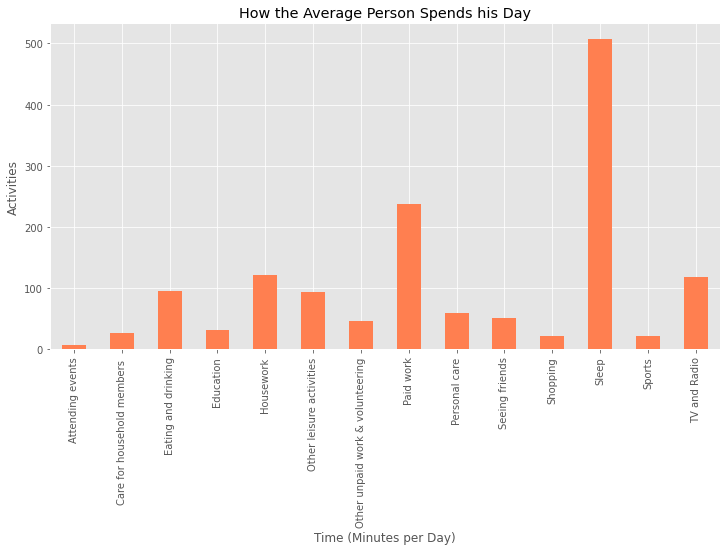

In [ ]:
# Bar Graph

df_average.plot(kind='bar',
          figsize=(12,6),
          color=['Coral'], legend=None)

plt.title('How the Average Person Spends his Day')
plt.ylabel('Activities')
plt.xlabel('Time (Minutes per Day)')
plt.show()

**Insight:** Here we graphed the same data from an individualized perspective. In order to do that, we took the sum of all categories and divided it by 33 (since there are 33 countries). Again, we see that most of our time is spent in sleep, paid work, and some form of entertainment or leisure. So, invest in a good mattress, because sleep truly effects everything, primarily your mood and health. Don’t settle for a job you don’t like or work in a toxic working condition. You spend too much time of your life working to spend it doing something you don’t enjoy. Lastly, find a hobby that gives you peace or is enriching

**Scatter Plot- Same data, different presentation- Created by Iman Mohammed**

In [ ]:
!pip install plotly
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Another look: Scatter Plot
px.scatter(df_average, x='Time', size='Time', color_continuous_scale='Red', title='How the Average Person Spends his Day')

**Insight:** This is the scatter plot version of the previous graph. Here we graphed the same data from an individualized perspective. In order to do that, we took the sum of all activities and divided it by 33 (since there are 33 countries).

**Stacked Horizontal Bar Graph: A Comparisons Between US, Japan and Spain - Created by Iman Mohammed**

In [ ]:
# Isolating data for Japan, USA and Spain
df_JUS= df_time_per_country.loc[['Japan','USA','Spain']]
df_JUS

,Category,Time
Country,,
Japan,Paid work,325.711372
Japan,Education,36.980000
Japan,Care for household members,0.000000
Japan,Housework,80.370473
Japan,Shopping,24.928908
Japan,Other unpaid work & volunteering,97.724183
Japan,Sleep,442.020938
Japan,Eating and drinking,93.454218
Japan,Personal care,84.562961


In [ ]:
# Stacked Horizontal Bar Graph
px.bar(df_JUS, x='Time', color='Category',
       color_discrete_sequence=px.colors.qualitative.Plotly,
       title='A Comparison between US, Japan, and Spain')

**Insight:** This graph shows the time spent in each activity measured in minutes for the following countries: Spain, USA, and Japan.  From the main dataset, we chose Spain, USA, and Japan because of their different cultures and geographic locations. Our goal is to observe how these two factors impact their populations. The data shows that the Spanish work the least, sleep and eat the most, and spend a considerable amount of time on leisure and entertainment. I visited Spain in 2011 and observed that they are a relaxed population who love to enjoy a relaxed lifestyle, so I was not surprised to see the the data reflect my observations. The Japanese appear to be the most dedicated to work and productivity as they spend the most time out of all three nations at work and the least on sleep. Interestingly, the Japanese have the largest leisurely category of all three nations. This leads me to believe that Japan’s culture is rooted in hard work and personal enjoyment.  The old moniker “work hard, play hard” comes to mind. The USA leads the way in TV and Radio but were otherwise average in other categories.

##The Gender Gap in Leisure Time##

In [ ]:
# Dataset #2: Minutes Spent on Leisure: Women v. Men

df_leisure = pd.read_excel('/content/drive/My Drive/Data Visualization/minutes-spent-on-leisure.xlsx')

In [ ]:
# To explore the size of the dataset:
df_leisure.shape

(56960, 7)

In [ ]:
df_leisure

,Entity,Code,Year,Minutes spent on leisure - women (OECD Gender data (2020)),Minutes spent on leisure - men (OECD Gender data (2020)),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015.0,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,-10000.0,NaN,NaN,14737.0,NaN
2,Afghanistan,AFG,-9000.0,NaN,NaN,20405.0,NaN
3,Afghanistan,AFG,-8000.0,NaN,NaN,28253.0,NaN
4,Afghanistan,AFG,-7000.0,NaN,NaN,39120.0,NaN
...,...,...,...,...,...,...,...
56955,Zimbabwe,ZWE,2018.0,NaN,NaN,15052191.0,NaN
56956,Zimbabwe,ZWE,2019.0,NaN,NaN,15354606.0,NaN
56957,Zimbabwe,ZWE,2020.0,NaN,NaN,15669663.0,NaN
56958,Zimbabwe,ZWE,2021.0,NaN,NaN,15993525.0,NaN


**Cleaning Data**

In [ ]:
# To drop unnecesary columns:
df_leisure.drop(['Code','Continent','Population (historical estimates)'],axis=1,inplace=True)

In [ ]:
df_leisure

,Entity,Year,Minutes spent on leisure - women (OECD Gender data (2020)),Minutes spent on leisure - men (OECD Gender data (2020))
0,Abkhazia,2015.0,NaN,NaN
1,Afghanistan,-10000.0,NaN,NaN
2,Afghanistan,-9000.0,NaN,NaN
3,Afghanistan,-8000.0,NaN,NaN
4,Afghanistan,-7000.0,NaN,NaN
...,...,...,...,...
56955,Zimbabwe,2018.0,NaN,NaN
56956,Zimbabwe,2019.0,NaN,NaN
56957,Zimbabwe,2020.0,NaN,NaN
56958,Zimbabwe,2021.0,NaN,NaN


In [ ]:
# To rename the columns:
df_leisure.rename(columns={'Entity':'Country',
                           'Minutes spent on leisure - women (OECD Gender data (2020))':'Minutes Women Spent on Leisure',
                           'Minutes spent on leisure - men (OECD Gender data (2020))':'Minutes Men Spent on Leisure',
                           'Population (historical estimates)':'Population'},inplace=True)

In [ ]:
df_leisure

,Country,Year,Minutes Women Spent on Leisure,Minutes Men Spent on Leisure
0,Abkhazia,2015.0,NaN,NaN
1,Afghanistan,-10000.0,NaN,NaN
2,Afghanistan,-9000.0,NaN,NaN
3,Afghanistan,-8000.0,NaN,NaN
4,Afghanistan,-7000.0,NaN,NaN
...,...,...,...,...
56955,Zimbabwe,2018.0,NaN,NaN
56956,Zimbabwe,2019.0,NaN,NaN
56957,Zimbabwe,2020.0,NaN,NaN
56958,Zimbabwe,2021.0,NaN,NaN


In [ ]:
df_leisure.set_index('Country',inplace=True)

**Choosing the top 5 most populated countries: USA, China, India, Mexico, Japan**

In [ ]:
# Isolating data for China

df_china= df_leisure.loc['China']

In [ ]:
df_china.set_index('Year',inplace=True)

In [ ]:
df_china

,Minutes Women Spent on Leisure,Minutes Men Spent on Leisure
Year,,
2020.0,211.0,248.0
-10000.0,NaN,NaN
-9000.0,NaN,NaN
-8000.0,NaN,NaN
-7000.0,NaN,NaN
...,...,...
2016.0,NaN,NaN
2017.0,NaN,NaN
2018.0,NaN,NaN


In [ ]:
df_china=df_china.loc[2020]

In [ ]:
df_china

Minutes Women Spent on Leisure    211.0
Minutes Men Spent on Leisure      248.0
Name: 2020.0, dtype: float64

In [ ]:
# Isolating data for India
df_india= df_leisure.loc['India']
df_india.set_index('Year',inplace=True)
df_india

,Minutes Women Spent on Leisure,Minutes Men Spent on Leisure
Year,,
2020.0,221.0,283.0
-10000.0,NaN,NaN
-9000.0,NaN,NaN
-8000.0,NaN,NaN
-7000.0,NaN,NaN
...,...,...
2016.0,NaN,NaN
2017.0,NaN,NaN
2018.0,NaN,NaN


In [ ]:
df_india=df_india.loc[2020]
df_india

Minutes Women Spent on Leisure    221.0
Minutes Men Spent on Leisure      283.0
Name: 2020.0, dtype: float64

In [ ]:
# Isolating data for USA
df_USA=df_leisure.loc['United States']
df_USA.set_index('Year',inplace=True)
df_USA

,Minutes Women Spent on Leisure,Minutes Men Spent on Leisure
Year,,
2020.0,267.0,316.0
-10000.0,NaN,NaN
-9000.0,NaN,NaN
-8000.0,NaN,NaN
-7000.0,NaN,NaN
...,...,...
2016.0,NaN,NaN
2017.0,NaN,NaN
2018.0,NaN,NaN


In [ ]:
df_USA=df_USA.loc[2020]
df_USA

Minutes Women Spent on Leisure    267.0
Minutes Men Spent on Leisure      316.0
Name: 2020.0, dtype: float64

In [ ]:
# Isolating data for Japan
df_Jap=df_leisure.loc['Japan']
df_Jap.set_index('Year',inplace=True)
df_Jap

,Minutes Women Spent on Leisure,Minutes Men Spent on Leisure
Year,,
2020.0,266.0,292.0
-10000.0,NaN,NaN
-9000.0,NaN,NaN
-8000.0,NaN,NaN
-7000.0,NaN,NaN
...,...,...
2016.0,NaN,NaN
2017.0,NaN,NaN
2018.0,NaN,NaN


In [ ]:
df_Jap=df_Jap.loc[2020]
df_Jap

Minutes Women Spent on Leisure    266.0
Minutes Men Spent on Leisure      292.0
Name: 2020.0, dtype: float64

In [ ]:
# Isolating data for Mexico
df_Mex=df_leisure.loc['Mexico']
df_Mex.set_index('Year',inplace=True)
df_Mex

,Minutes Women Spent on Leisure,Minutes Men Spent on Leisure
Year,,
2020.0,159.0,187.0
-10000.0,NaN,NaN
-9000.0,NaN,NaN
-8000.0,NaN,NaN
-7000.0,NaN,NaN
...,...,...
2016.0,NaN,NaN
2017.0,NaN,NaN
2018.0,NaN,NaN


In [ ]:
df_Mex=df_Mex.loc[2020]
df_Mex

Minutes Women Spent on Leisure    159.0
Minutes Men Spent on Leisure      187.0
Name: 2020.0, dtype: float64

In [ ]:
# Concatenate the data

df_top5 = pd.concat([df_china,df_india,df_USA, df_Jap, df_Mex],axis=1).transpose()

df_top5

,Minutes Women Spent on Leisure,Minutes Men Spent on Leisure
2020.0,211.0,248.0
2020.0,221.0,283.0
2020.0,267.0,316.0
2020.0,266.0,292.0
2020.0,159.0,187.0


In [ ]:
df_top5.reset_index()

,index,Minutes Women Spent on Leisure,Minutes Men Spent on Leisure
0,2020.0,211.0,248.0
1,2020.0,221.0,283.0
2,2020.0,267.0,316.0
3,2020.0,266.0,292.0
4,2020.0,159.0,187.0


**Box Plot Graph: The Gender Gap in Leisure Time: Men v. Women**

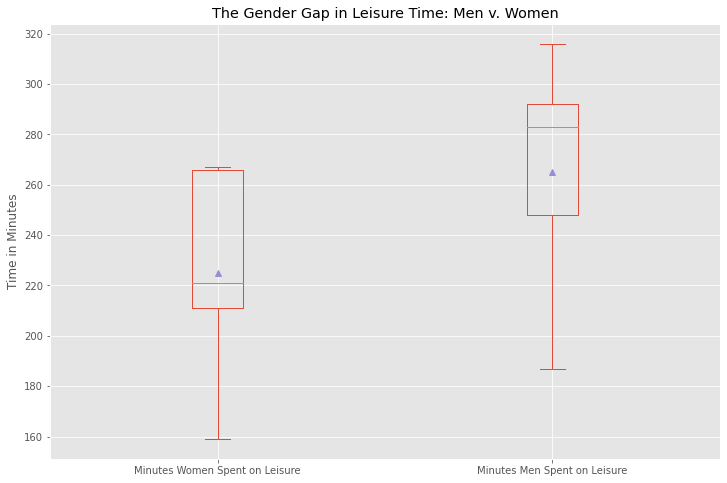

In [ ]:
# Box Plot Graph:

df_top5.plot(kind='box',figsize=(12,8), showmeans=True)
plt.title('The Gender Gap in Leisure Time: Men v. Women')
plt.ylabel('Time in Minutes')

plt.show()

**Description:** These box plots represent the minutes women vs men spent on leisure daily. It is only taking into consideration the 5 most populated countries in the dataset which are: Mexico, Japan, Usa, India, and China.

**Insights:** Understanding conclusive gaps in any observation between genders is essential because such studies are key in identifying and remedying inequalities that exist. This box plot easily demonstrates the wide gap of leisurely time spent by men v. women. At the most, men are spending almost 320 minutes on leisure, while women peak at just above 260 minutes. The median of both plots reflect the same findings on a broader scope. Moreover, even those these observations are reflective of only the top five populated countries in the study, they are still true when examining the larger dataset. A key factor driving this gender gap in leisure time is in unpaid work. Women are responsible for a disproportionate amount of unpaid work, resulting in less time for leisure activities.

## Who Americans Spend Their Time With - Yeosaine Sanchez

In [ ]:
# Dataset 3: Who Americans Spend their Time With
# Reading the dataset:
df_US = pd.read_excel('/content/drive/My Drive/Data Visualization/time-spent-with-relationships-by-age-us.xlsx')

In [ ]:
df_US.head() #Exploring the head of the data

,Entity,Code,Year,"Time spent alone, by age of respondent (United States)","Time spent with friends, by age of respondent (United States)","Time spent with children, by age of respondent (United States)","Time spent with with parents, siblings and other family, by age of respondent (United States)","Time spent with partner, by age of respondent (United States)","Time spent with coworkers, by age of respondent (United States)"
0,United States,USA,15,193.30588,109.41450,23.463852,267.12091,0.000000,8.342007
1,United States,USA,16,206.37056,110.74180,28.609867,254.33810,0.030691,23.529137
2,United States,USA,17,224.17331,120.41887,26.089708,229.81561,1.122841,43.809685
3,United States,USA,18,242.69839,137.75107,27.387308,236.35201,5.697267,81.633575
4,United States,USA,19,267.79385,129.85716,36.445004,201.27660,19.341291,124.850520


In [ ]:
df_US.shape # Exploring the dimensions of the dataset

(67, 9)

#Cleaning the "Who Americans Spend Their Time With" Dataset

In [ ]:
df_US.drop(['Entity','Code'],axis=1,inplace=True) # To remove entity name and code column since they are redundant

In [ ]:
df_US.head()

,Year,"Time spent alone, by age of respondent (United States)","Time spent with friends, by age of respondent (United States)","Time spent with children, by age of respondent (United States)","Time spent with with parents, siblings and other family, by age of respondent (United States)","Time spent with partner, by age of respondent (United States)","Time spent with coworkers, by age of respondent (United States)"
0,15,193.30588,109.41450,23.463852,267.12091,0.000000,8.342007
1,16,206.37056,110.74180,28.609867,254.33810,0.030691,23.529137
2,17,224.17331,120.41887,26.089708,229.81561,1.122841,43.809685
3,18,242.69839,137.75107,27.387308,236.35201,5.697267,81.633575
4,19,267.79385,129.85716,36.445004,201.27660,19.341291,124.850520


In [ ]:
# To rename columns to better understand the data. For example, the column 'Year' does not properly represents Age which is the value collected.
df_US.rename(columns={'Year':'Age','Time spent alone, by age of respondent (United States)':'Time spent alone','Time spent with friends, by age of respondent (United States)':'Time spent with friends','Time spent with children, by age of respondent (United States)':'Time spent with children','Time spent with with parents, siblings and other family, by age of respondent (United States)':'Time spent with parents,siblings, or other family','Time spent with partner, by age of respondent (United States)':'Time spent with partner','Time spent with coworkers, by age of respondent (United States)':'Time spent with coworkers'},inplace=True)

In [ ]:
df_US.head()

,Age,Time spent alone,Time spent with friends,Time spent with children,"Time spent with parents,siblings, or other family",Time spent with partner,Time spent with coworkers
0,15,193.30588,109.41450,23.463852,267.12091,0.000000,8.342007
1,16,206.37056,110.74180,28.609867,254.33810,0.030691,23.529137
2,17,224.17331,120.41887,26.089708,229.81561,1.122841,43.809685
3,18,242.69839,137.75107,27.387308,236.35201,5.697267,81.633575
4,19,267.79385,129.85716,36.445004,201.27660,19.341291,124.850520


In [ ]:
# Just selecting the group age of 16-70:
df_US= df_US.iloc[1:56]

In [ ]:
df_US

,Age,Time spent alone,Time spent with friends,Time spent with children,"Time spent with parents,siblings, or other family",Time spent with partner,Time spent with coworkers
1,16,206.37056,110.741800,28.609867,254.338100,0.030691,23.529137
2,17,224.17331,120.418870,26.089708,229.815610,1.122841,43.809685
3,18,242.69839,137.751070,27.387308,236.352010,5.697267,81.633575
4,19,267.79385,129.857160,36.445004,201.276600,19.341291,124.850520
5,20,277.60379,122.740200,54.630512,173.135030,26.354170,143.900300
6,21,270.21817,122.406270,69.293869,152.673310,59.897781,154.209720
7,22,283.56686,100.168620,72.302246,135.826600,55.767094,173.047300
8,23,270.93015,101.071770,96.935883,125.793330,78.188667,190.105240
9,24,265.81378,96.786346,99.394424,103.758450,99.444160,206.054860
10,25,275.12906,77.543015,119.509710,101.027440,121.250830,199.209170


In [ ]:
# To index by Age for the ease of visualizing the data
df_US.set_index('Age',inplace=True)

In [ ]:
df_US

,Time spent alone,Time spent with friends,Time spent with children,"Time spent with parents,siblings, or other family",Time spent with partner,Time spent with coworkers
Age,,,,,,
16,206.37056,110.741800,28.609867,254.338100,0.030691,23.529137
17,224.17331,120.418870,26.089708,229.815610,1.122841,43.809685
18,242.69839,137.751070,27.387308,236.352010,5.697267,81.633575
19,267.79385,129.857160,36.445004,201.276600,19.341291,124.850520
20,277.60379,122.740200,54.630512,173.135030,26.354170,143.900300
21,270.21817,122.406270,69.293869,152.673310,59.897781,154.209720
22,283.56686,100.168620,72.302246,135.826600,55.767094,173.047300
23,270.93015,101.071770,96.935883,125.793330,78.188667,190.105240
24,265.81378,96.786346,99.394424,103.758450,99.444160,206.054860


# Line Graph: Who Americans Spend Their Time With:
#Created by Yeosaine Sanchez

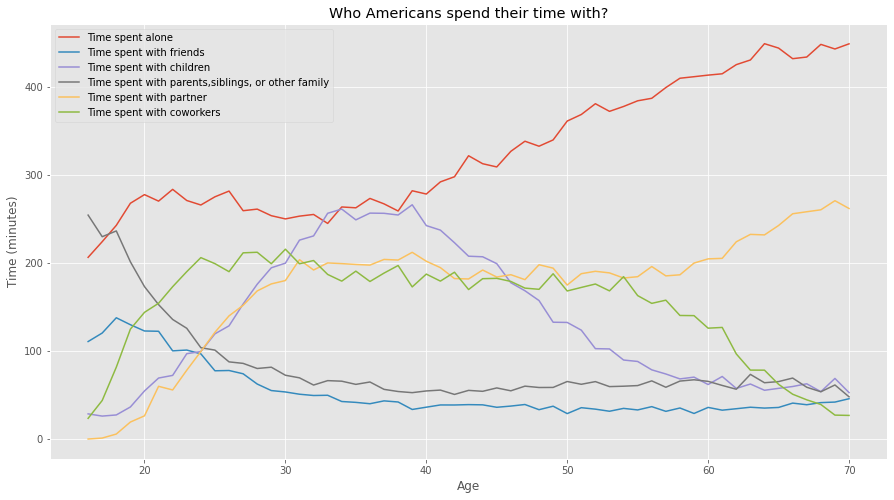

In [ ]:
#To create the line plot:
df_US.plot(kind='line',
             figsize=(15,8))

plt.title('Who Americans spend their time with?')
plt.ylabel('Time (minutes)')
plt.xlabel('Age')
plt.show()

**Description:** This plot shows the amount of time (measured in minutes) that Americans spend alone or with family, children, cowokers, friends, and partner in a day. The age group represented is from 16-70 years old.

**Insights:** During their teens (16-18), Americans spend most of their time with parents/siblings or alone. Yet, once Americans turn 18 years old the amount of time spent with family decreases drastically. At 18 years old, most Americans move away from their parent’s house to go to college. Once Americans turn 20, time spent with coworkers, partners, and children starts to increase significantly. During the ages 30-40, it's when Americans spend more time with their children. In their mid-30s, time spent with family and friends starts to become stable following the same pattern for the rest of their lives. In their 40s, time spent alone starts to increase significantly and time spent with children decreases likewise. During their elder years (60-70s), Americans spend more time alone followed by time spent with their partner.

## Annual Working Hours for Bangladesh, Brazil and Denmark- Yeosaine Sanchez

**Cleaning Dataset**

In [ ]:
#Dataset 4- Annual Working Hours
#Reading the dataset
df_U= pd.read_excel('/content/drive/My Drive/Data Visualization/annual-working-hours-per-worker.xlsx')

In [ ]:
#Exploring the size of the dataset
df_U.shape

(3470, 4)

In [ ]:
df_U.head()

,Entity,Code,Year,Average annual working hours per worker
0,Argentina,ARG,1950.0,2034.0000
1,Argentina,ARG,1951.0,2037.8667
2,Argentina,ARG,1952.0,2041.7408
3,Argentina,ARG,1953.0,2045.6223
4,Argentina,ARG,1954.0,2049.5112


In [ ]:
#Drop Code as a column since it is redundant.
df_U.drop(['Code'],axis=1,inplace=True)

In [ ]:
#Rename columns
df_U.rename(columns={'Entity':'Country'},inplace=True)

In [ ]:
df_U.head()

,Country,Year,Average annual working hours per worker
0,Argentina,1950.0,2034.0000
1,Argentina,1951.0,2037.8667
2,Argentina,1952.0,2041.7408
3,Argentina,1953.0,2045.6223
4,Argentina,1954.0,2049.5112


In [ ]:
#Indexing by country to obtain the countries that I am interested in
df_U.set_index('Country',inplace=True)

In [ ]:
df_U

,Year,Average annual working hours per worker
Country,,
Argentina,1950.0,2034.0000
Argentina,1951.0,2037.8667
Argentina,1952.0,2041.7408
Argentina,1953.0,2045.6223
Argentina,1954.0,2049.5112
...,...,...
Vietnam,2013.0,2267.4883
Vietnam,2014.0,2150.6357
Vietnam,2015.0,2169.5916


 **Getting Brazil**

In [ ]:
df_Brazil= df_U.loc['Brazil']

In [ ]:
df_Brazil

,Year,Average annual working hours per worker
Country,,
Brazil,1950.0,2042.0000
Brazil,1951.0,2051.0186
Brazil,1952.0,2060.0771
Brazil,1953.0,2069.1755
Brazil,1954.0,2078.3142
...,...,...
Brazil,2013.0,1755.6323
Brazil,2014.0,1739.4747
Brazil,2015.0,1709.4856


In [ ]:
df_Brazil.reset_index()

,Country,Year,Average annual working hours per worker
0,Brazil,1950.0,2042.0000
1,Brazil,1951.0,2051.0186
2,Brazil,1952.0,2060.0771
3,Brazil,1953.0,2069.1755
4,Brazil,1954.0,2078.3142
...,...,...,...
63,Brazil,2013.0,1755.6323
64,Brazil,2014.0,1739.4747
65,Brazil,2015.0,1709.4856
66,Brazil,2016.0,1709.4856


In [ ]:
#Indexing by year to obtain the years that I wanted
df_Brazil.set_index('Year',inplace=True)

In [ ]:
df_Brazil

,Average annual working hours per worker
Year,
1950.0,2042.0000
1951.0,2051.0186
1952.0,2060.0771
1953.0,2069.1755
1954.0,2078.3142
...,...
2013.0,1755.6323
2014.0,1739.4747
2015.0,1709.4856


In [ ]:
#Selecting the years that I am interested in 1980-2017
df_Brazil= df_Brazil.loc['1980':'2018']

In [ ]:
df_Brazil

,Average annual working hours per worker
Year,
1980.0,1985.0000
1981.0,1974.0968
1982.0,1963.2535
1983.0,1952.4698
1984.0,1941.7454
1985.0,1931.0797
1986.0,1920.4728
1987.0,1909.9240
1988.0,1899.4332


In [ ]:
#Renaming columns
df_Brazil.rename(columns={'Average annual working hours per worker':'Brazil'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_Brazil

,Brazil
Year,
1980.0,1985.0000
1981.0,1974.0968
1982.0,1963.2535
1983.0,1952.4698
1984.0,1941.7454
1985.0,1931.0797
1986.0,1920.4728
1987.0,1909.9240
1988.0,1899.4332


**Getting Bangladesh**

In [ ]:
df_Bangladesh=df_U.loc['Bangladesh']

In [ ]:
df_Bangladesh

,Year,Average annual working hours per worker
Country,,
Bangladesh,1970.0,2071.4104
Bangladesh,1971.0,2075.1843
Bangladesh,1972.0,2078.1372
Bangladesh,1973.0,2079.9597
Bangladesh,1974.0,2081.0764
Bangladesh,1975.0,2085.5564
Bangladesh,1976.0,2087.4951
Bangladesh,1977.0,2089.5979
Bangladesh,1978.0,2092.1418


In [ ]:
df_Bangladesh.reset_index()

,Country,Year,Average annual working hours per worker
0,Bangladesh,1970.0,2071.4104
1,Bangladesh,1971.0,2075.1843
2,Bangladesh,1972.0,2078.1372
3,Bangladesh,1973.0,2079.9597
4,Bangladesh,1974.0,2081.0764
5,Bangladesh,1975.0,2085.5564
6,Bangladesh,1976.0,2087.4951
7,Bangladesh,1977.0,2089.5979
8,Bangladesh,1978.0,2092.1418
9,Bangladesh,1979.0,2095.2627


In [ ]:
df_Bangladesh.set_index('Year',inplace=True)

In [ ]:
df_Bangladesh

,Average annual working hours per worker
Year,
1970.0,2071.4104
1971.0,2075.1843
1972.0,2078.1372
1973.0,2079.9597
1974.0,2081.0764
1975.0,2085.5564
1976.0,2087.4951
1977.0,2089.5979
1978.0,2092.1418


In [ ]:
df_Bangladesh= df_Bangladesh.loc['1980':'2018']

In [ ]:
df_Bangladesh

,Average annual working hours per worker
Year,
1980.0,2099.0146
1981.0,2103.7871
1982.0,2117.3760
1983.0,2130.7109
1984.0,2143.5508
1985.0,2111.8611
1986.0,2083.7917
1987.0,2066.4663
1988.0,2052.2288


In [ ]:
df_Bangladesh.rename(columns={'Average annual working hours per worker':'Bangladesh'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_Bangladesh

,Bangladesh
Year,
1980.0,2099.0146
1981.0,2103.7871
1982.0,2117.3760
1983.0,2130.7109
1984.0,2143.5508
1985.0,2111.8611
1986.0,2083.7917
1987.0,2066.4663
1988.0,2052.2288


**Getting Denmark**

In [ ]:
df_Den=df_U.loc['Denmark']

In [ ]:
df_Den.set_index('Year',inplace=True)

In [ ]:
df_Den=df_Den.loc['1980':'2018']

In [ ]:
df_Den.rename(columns={'Average annual working hours per worker':'Denmark'},inplace=True)

In [ ]:
df_Den

,Denmark
Year,
1980.0,1577.5864
1981.0,1546.2460
1982.0,1552.7933
1983.0,1545.7714
1984.0,1540.6416
1985.0,1527.7089
1986.0,1530.6967
1987.0,1492.7634
1988.0,1471.0034


**Concatenate all of them**

In [ ]:
df = pd.concat([df_Bangladesh,df_Brazil,df_Den],axis=1)

In [ ]:
df

,Bangladesh,Brazil,Denmark
Year,,,
1980.0,2099.0146,1985.0000,1577.5864
1981.0,2103.7871,1974.0968,1546.2460
1982.0,2117.3760,1963.2535,1552.7933
1983.0,2130.7109,1952.4698,1545.7714
1984.0,2143.5508,1941.7454,1540.6416
1985.0,2111.8611,1931.0797,1527.7089
1986.0,2083.7917,1920.4728,1530.6967
1987.0,2066.4663,1909.9240,1492.7634
1988.0,2052.2288,1899.4332,1471.0034


## Area Plot: Annual Working Hours Bangladesh, Brazil, and Denmark- Created by Yeosaine Sanchez

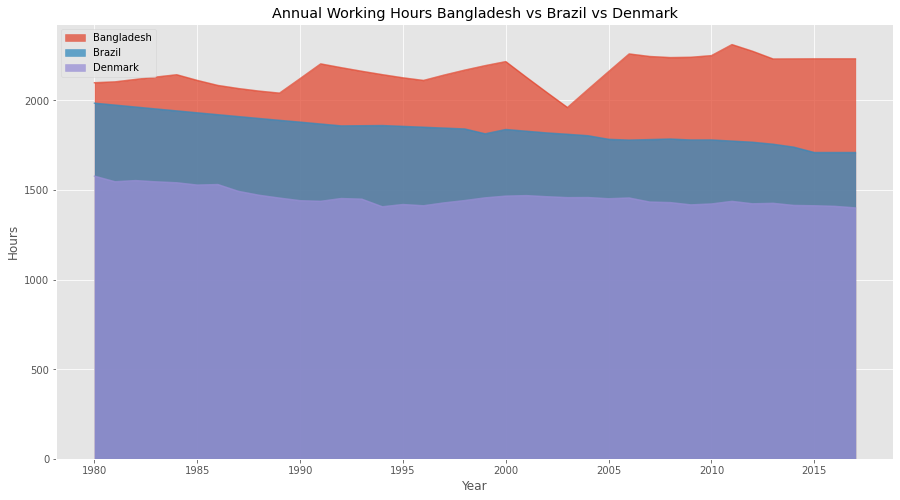

In [ ]:
#Area plot
df.plot(kind='area',
        stacked= False,
        alpha=0.75,
        figsize=(15,8))
plt.title('Annual Working Hours Bangladesh vs Brazil vs Denmark')
plt.ylabel('Hours')
plt.xlabel('Year')
plt.show()

**Description:** This graph represents the average annual working hours per worker in the countries Brazil, Bangladesh, and Denmark from the years 1980-2017.

**Insights:** We decided to plot these three countries due to their different economy. Denmark (High Income Country), Brazil (Upper-Middle Income Country), and Bangladesh, (Lower-Middle Income Country). We wanted to know if countries that are richer tend to work more hours. Yet, this graph indicates that lower-income countries tend to work more hours than richer countries. When researching the reasons, we discovered that workers in richer countries can afford to work fewer hours than those in lower-income countries.

##  Area Plot: GDP per Capita for Bangladesh, Brazil, Denmark - Created by Yeosaine Sanchez

**Cleaning the dataset:**

In [ ]:
#Dataset 5: Annual working hours vs GDP per capita
#Reading the dataset
df_WGDP= pd.read_excel('/content/drive/My Drive/Data Visualization/annual-working-hours-vs-gdp-per-capita.xlsx')

In [ ]:
#Exploring the size of the data:
df_WGDP.shape

(55078, 7)

In [ ]:
df_WGDP

,Entity,Code,Year,Annual working hours per worker,"GDP per capita (output, multiple price benchmarks)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,0,NaN,NaN,1999997.0,NaN
2,Afghanistan,AFG,100,NaN,NaN,2250002.0,NaN
3,Afghanistan,AFG,200,NaN,NaN,2500001.0,NaN
4,Afghanistan,AFG,300,NaN,NaN,2500001.0,NaN
...,...,...,...,...,...,...,...
55073,Zimbabwe,ZWE,2018,NaN,3007.236919,15052191.0,NaN
55074,Zimbabwe,ZWE,2019,NaN,2787.658975,15354606.0,NaN
55075,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0,NaN
55076,Zimbabwe,ZWE,2021,NaN,NaN,15993525.0,NaN


In [ ]:
# Dropping unnecesary columns:
df_WGDP.drop(['Code','Annual working hours per worker','Population (historical estimates)','Continent'],axis=1,inplace=True)

In [ ]:
#Renaming columns:
df_WGDP.rename(columns={'Entity':'Country','GDP per capita (output, multiple price benchmarks)':'GDP Per Capita'},inplace=True)

In [ ]:
# Indexing by country:
df_WGDP.set_index('Country',inplace=True)

In [ ]:
df_WGDP

,Year,GDP Per Capita
Country,,
Abkhazia,2015,NaN
Afghanistan,0,NaN
Afghanistan,100,NaN
Afghanistan,200,NaN
Afghanistan,300,NaN
...,...,...
Zimbabwe,2018,3007.236919
Zimbabwe,2019,2787.658975
Zimbabwe,2020,NaN


**Getting Denmark**

In [ ]:
df_Denmark=df_WGDP.loc['Denmark']

In [ ]:
df_Denmark

,Year,GDP Per Capita
Country,,
Denmark,0,NaN
Denmark,100,NaN
Denmark,200,NaN
Denmark,300,NaN
Denmark,400,NaN
...,...,...
Denmark,2017,51671.596647
Denmark,2018,51931.836811
Denmark,2019,54027.148192


In [ ]:
df_Denmark.reset_index()

,Country,Year,GDP Per Capita
0,Denmark,0,NaN
1,Denmark,100,NaN
2,Denmark,200,NaN
3,Denmark,300,NaN
4,Denmark,400,NaN
...,...,...,...
244,Denmark,2017,51671.596647
245,Denmark,2018,51931.836811
246,Denmark,2019,54027.148192
247,Denmark,2020,NaN


In [ ]:
df_Denmark.set_index('Year',inplace=True)

In [ ]:
#Selecting desired years 1980-2018 to compare it to annual working hours:
df_Denmark=df_Denmark.loc['1980':'2018']

In [ ]:
df_Denmark.rename(columns={'GDP Per Capita':'Denmark'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Getting Brazil**

In [ ]:
df_Braz=df_WGDP.loc['Brazil']

In [ ]:
df_Braz

,Year,GDP Per Capita
Country,,
Brazil,0,NaN
Brazil,100,NaN
Brazil,200,NaN
Brazil,300,NaN
Brazil,400,NaN
...,...,...
Brazil,2017,14284.611894
Brazil,2018,14522.992944
Brazil,2019,14593.960687


In [ ]:
df_Braz.reset_index()

,Country,Year,GDP Per Capita
0,Brazil,0,NaN
1,Brazil,100,NaN
2,Brazil,200,NaN
3,Brazil,300,NaN
4,Brazil,400,NaN
...,...,...,...
244,Brazil,2017,14284.611894
245,Brazil,2018,14522.992944
246,Brazil,2019,14593.960687
247,Brazil,2020,NaN


In [ ]:
df_Braz.set_index('Year',inplace=True)

In [ ]:
df_Braz=df_Braz.loc['1980':'2018']

In [ ]:
df_Braz.rename(columns={'GDP Per Capita':'Brazil'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Getting Bangladesh**

In [ ]:
df_Bangla=df_WGDP.loc['Bangladesh']

In [ ]:
df_Bangla

,Year,GDP Per Capita
Country,,
Bangladesh,0,NaN
Bangladesh,100,NaN
Bangladesh,200,NaN
Bangladesh,300,NaN
Bangladesh,400,NaN
...,...,...
Bangladesh,2017,4112.704347
Bangladesh,2018,4428.145619
Bangladesh,2019,4658.009856


In [ ]:
df_Bangla.reset_index()

,Country,Year,GDP Per Capita
0,Bangladesh,0,NaN
1,Bangladesh,100,NaN
2,Bangladesh,200,NaN
3,Bangladesh,300,NaN
4,Bangladesh,400,NaN
...,...,...,...
244,Bangladesh,2017,4112.704347
245,Bangladesh,2018,4428.145619
246,Bangladesh,2019,4658.009856
247,Bangladesh,2020,NaN


In [ ]:
df_Bangla.set_index('Year',inplace=True)

In [ ]:
df_Bangla=df_Bangla.loc['1980':'2018']

In [ ]:
df_Bangla.rename(columns={'GDP Per Capita':'Bangladesh'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Concatenating all**

In [ ]:
df_BBD = pd.concat([df_Bangla,df_Braz,df_Denmark],axis=1)

In [ ]:
df_BBD

,Bangladesh,Brazil,Denmark
Year,,,
1980,1333.431779,5876.956991,23979.724424
1981,1325.157502,5949.227095,23128.795389
1982,1288.685525,5947.452292,23511.057233
1983,1280.021369,5689.513089,23736.129795
1984,1369.768662,5770.794567,24247.697153
1985,1393.285950,5942.823636,24626.002201
1986,1390.764727,6652.941864,26436.166076
1987,1360.625266,6739.374803,27056.192434
1988,1383.987247,6660.645019,27024.981840


## GDP Per Capita for Denmark, Brazil, and Bangladesh: Created by Yeosaine Sanchez

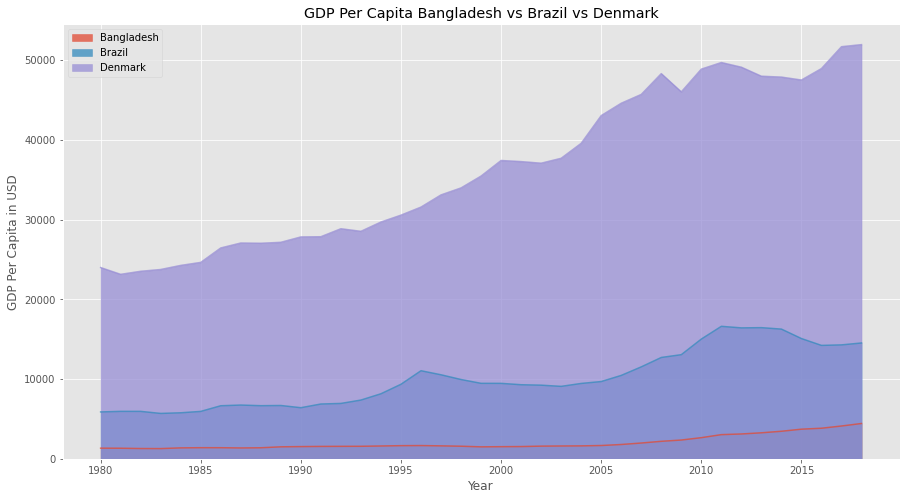

In [ ]:
#Area plot
df_BBD.plot(kind='area',
        stacked= False,
        alpha=0.75,
        figsize=(15,8))
plt.title('GDP Per Capita Bangladesh vs Brazil vs Denmark')
plt.ylabel('GDP Per Capita in USD')
plt.xlabel('Year')
plt.show()

**Description:** This graph represents the GDP Per Capita for the following countries: Brazil, Bangladesh, and Denmark from the years 1980-2017.

**Insights:** We decided to plot these three countries in order to portray the contrast in their economies.  By observing the graph, we can conclude that Denmark is the country with the highest GDP per capita out of these three nations, followed by Brazil and then Bangladesh.

## Choropleth Map: Labor Productivity Across the World - Yeosaine Sanchez

In [ ]:
#Importing necessary packages:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

/bin/bash: conda: command not found


**Cleaning the dataset**

In [ ]:
# Dataset 6: Labor Productivity
#Reading the dataset:
df_productivity= pd.read_excel('/content/drive/My Drive/Data Visualization/Labor Productivity.xlsx')

In [ ]:
# Exploring the size of the dataset:
df_productivity.shape

(185, 3)

In [ ]:
df_productivity

,Group,Country,GDP per hour worked (GDP constant 2017 international $ at PPP)
0,Low income countries,Afghanistan,4.1
1,Lower-middle income countries,Angola,7.8
2,Upper-middle income countries,Albania,15.3
3,High income countries,United Arab Emirates,36.9
4,Upper-middle income countries,Argentina,29.8
...,...,...,...
180,Upper-middle income countries,Venezuela,10.8
181,High income countries,United States Virgin Islands,53.0
182,Lower-middle income countries,Viet Nam,7.3
183,Lower-middle income countries,Vanuatu,4.1


In [ ]:
# To drop unnecesary columns:
df_productivity.drop(['Group'],axis=1,inplace=True)

In [ ]:
# To rename columns:
df_productivity.rename(columns={'GDP per hour worked (GDP constant 2017 international $ at PPP)':'Productivity'},inplace=True)

In [ ]:
df_productivity

,Country,Productivity
0,Afghanistan,4.1
1,Angola,7.8
2,Albania,15.3
3,United Arab Emirates,36.9
4,Argentina,29.8
...,...,...
180,Venezuela,10.8
181,United States Virgin Islands,53.0
182,Viet Nam,7.3
183,Vanuatu,4.1


In [ ]:
df_productivity.head()

,Country,Productivity
0,Afghanistan,4.1
1,Angola,7.8
2,Albania,15.3
3,United Arab Emirates,36.9
4,Argentina,29.8


**Getting the JSON files with the countries boundaries**

In [ ]:
! wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json

In [ ]:
#Defining the world map:
world_geo = 'world_countries.json'
world_map = folium.Map(location=[0,0], zoom_start=2)

## Labor Productivity Across the World for 2021- Created by Yeosaine Sanchez

In [ ]:
# Generate the choropleth map
world_map.choropleth(
    geo_data = world_geo,
    data = df_productivity,
    columns = ['Country','Productivity'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='GDP Per Hour Worked Across Countries 2021'
)

world_map

/usr/local/lib/python3.8/dist-packages/folium/folium.py:409: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



**Desciption:** This map shows the GDP per Hour Worked Across the World for 2021. GDP Per Hour Worked is a popular measure of labor productivity. Some countries have missing data.

**Insights:** By looking at this map, we can observe that European and North American countries tend to have the highest labor productivity while South America and Africa tend to have lower labor productivity. Labor productivity can be influenced by technological innovation. Countries that have technological innovation can produce more GDP per hour worked by automating human processes. European and North American countries by being richer nations can afford new technologies and have an advantage over South American and African countries.

Furthermore, Luxembourg, Ireland, and the United States are the top performers for labor productivity in the year 2021.


##Contributions of Each Group Member##

Throughout the notebook, each graph title is followed by the name of its creator. For convience, we included a brief summary below:

**Iman Mohamed**


1.   Horizontal stacked bar graph- A “Global” Overview: How Do People Spend their Time
2.   Bar graph & Scatter plot - How the Average Person Spends His Day
3. Horizontal stacked bar graph- A Comparison between US, Japan, and Spain
4. Box Plot- The Gender Gap in Leisure: Men v. Women

**Yeosaine Sanchez**


1.   Line graph- Who Americans Spend their Time with?
2.   Area plot- Annual Working Hours: Bangladesh v. Brazil v. Denmark
3. Area plot- GDP per Capita: Bangladesh v. Brazil v. Denmark
4. Choropleth Map- Labor Productivity Across the World for 2021
